## PCA: Manual Calculation vs. `scikit-learn`

### Key Differences:
1. **Numerical Precision**: Minor variations due to different algorithms.
2. **Normalization**: `np.linalg.eig()` does not normalize eigenvectors; use `eigenvectors / np.linalg.norm()` to match `scikit-learn`.
3. **Order of Eigenvectors**: Sort eigenvalues and eigenvectors in descending order.
4. **Sign Ambiguity**: Eigenvectors may reverse direction; use `np.allclose()` for comparison.


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True, precision=2)

In [2]:
df = pd.read_csv("PCA_data.csv")

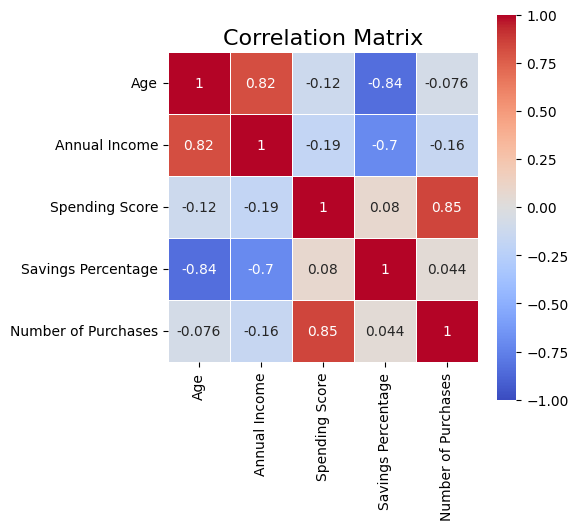

In [10]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(5, 5))

# Create a heatmap with Seaborn
sns.heatmap(correlation_matrix, 
            annot=True,        # Show correlation values
            cmap="coolwarm",   # Color map
            vmin=-1, vmax=1,   # Value range
            linewidths=0.5,    # Line width between cells
            square=True)       # Keep heatmap squares

# Add a title
plt.title("Correlation Matrix", fontsize=16)

# Show the plot
plt.show()

### Step 1. Create the matrix

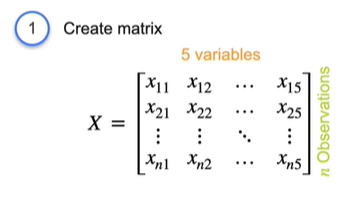

In [4]:
df.head()

,Age,Annual Income,Spending Score,Savings Percentage,Number of Purchases
0,56,38621.616139,69.882656,26.447738,11.587856
1,69,47666.089306,23.626452,7.120976,11.412087
2,46,46181.525542,18.320538,17.432937,5.125534
3,32,31466.396657,98.234666,26.724834,14.794906
4,60,52380.212937,52.146953,12.936192,10.618510


In [5]:
df.shape

(100, 5)

### Step 2. Center the Data

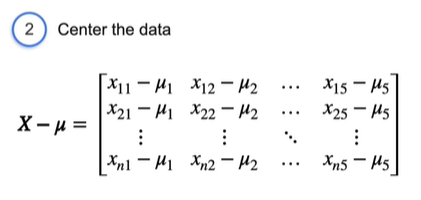

In [144]:
scaler = StandardScaler()
centered_data = scaler.fit_transform(df)
pd.DataFrame(centered_data).head()

,0,1,2,3,4
0,0.853003,-0.369864,0.620793,0.295847,0.425616
1,1.729608,0.660028,-0.992290,-1.826486,0.377402
2,0.178692,0.490981,-1.177322,-0.694097,-1.347040
3,-0.765343,-1.184628,1.609506,0.326275,1.305331
4,1.122728,1.196825,0.002299,-1.187899,0.159719


In [140]:
# Center the data by subtracting the mean
# centered_data = df - column_means
# centered_data

### Step 3 - Calculate Covariance Matrix
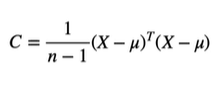

In [151]:
covariance_matrix = np.cov(data_scaled.T)
covariance_matrix

array([[ 1.01, -0.16, -0.23,  0.08, -0.06],
       [-0.16,  1.01,  0.14, -0.04, -0.13],
       [-0.23,  0.14,  1.01, -0.13, -0.04],
       [ 0.08, -0.04, -0.13,  1.01,  0.24],
       [-0.06, -0.13, -0.04,  0.24,  1.01]])

In [152]:
df_transposed.shape, df_centered_data.shape

((5, 100), (100, 5))

### Step 4 - Calculate Eigenvectors and EigenValues

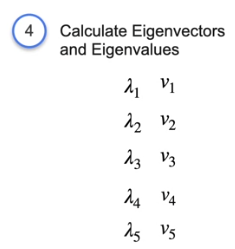

In [173]:
# Calculate eigenvalues and eigenvectors using np.linalg.eig()
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Normalize eigenvectors
eigenvectors_normalized = eigenvectors_sorted / np.linalg.norm(eigenvectors_sorted, axis=0)
eigenvectors_normalized

array([[-0.56, -0.2 ,  0.05,  0.22,  0.77],
       [-0.55, -0.12, -0.74, -0.08, -0.36],
       [ 0.24, -0.66, -0.09, -0.68,  0.2 ],
       [ 0.53,  0.23, -0.67,  0.18,  0.44],
       [ 0.21, -0.67, -0.02,  0.67, -0.22]])

### Step 5 - Create Projection Matrix

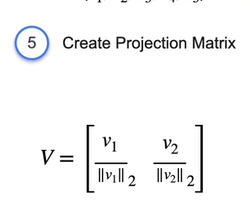

In [157]:
top_eigenvectors = eigenvectors_sorted[:, :k]
top_eigenvectors

array([[ 0.45, -0.52],
       [-0.45,  0.12],
       [-0.52,  0.29],
       [ 0.45,  0.44],
       [ 0.35,  0.66]])

In [158]:
top_eigenvectors.shape

(5, 2)

### Step 6 - Project Centered Data
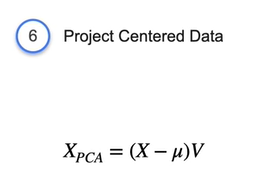

In [181]:
df_PCA = pd.DataFrame(data =data_scaled @ eigenvectors_normalized[:, :2])
df_PCA = df_PCA.rename(columns={0: 'PCA1', 1: 'PCA2'})
df_PCA.head()

,PCA1,PCA2
0,0.117454,-0.760436
1,-2.458801,-0.443483
2,-1.304546,1.434928
3,1.912325,-1.572991
4,-1.883019,-0.751020


### PCA (Principal Component Analysis) - Sklearn 

In [177]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [183]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
eigenvalues_sklearn = pca.explained_variance_
eigenvectors_sklearn = pca.components_
eigenvectors_sklearn.T

array([[ 0.56,  0.2 ],
       [ 0.55,  0.12],
       [-0.24,  0.66],
       [-0.53, -0.23],
       [-0.21,  0.67]])

In [184]:
eigenvalues_sklearn

array([2.69, 1.78])

In [180]:
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df.head()

,PC1,PC2
0,-0.117454,0.760436
1,2.458801,0.443483
2,1.304546,-1.434928
3,-1.912325,1.572991
4,1.883019,0.751020
